## Importing Module

In [1]:
import pandas as pd

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Import dataset

In [3]:
df = pd.read_csv('stroke-data.csv')
df.shape

(5110, 12)

In [4]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


## Checking null value is having or not

In [5]:
df.isna().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

### Here we found null in bmi column - have to fix this

In [6]:
# fill bmi with avarage vale of bmi
df.fillna(value={'bmi':df.bmi.mean()},inplace=True)
df.isna().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [7]:
df.head(10)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.000000,formerly smoked,1
6,53882,Male,74.0,1,1,Yes,Private,Rural,70.09,27.400000,never smoked,1
7,10434,Female,69.0,0,0,No,Private,Urban,94.39,22.800000,never smoked,1
8,27419,Female,59.0,0,0,Yes,Private,Rural,76.15,28.893237,Unknown,1
9,60491,Female,78.0,0,0,Yes,Private,Urban,58.57,24.200000,Unknown,1


## Visualize the correlation of data to detect less important feature

<AxesSubplot:>

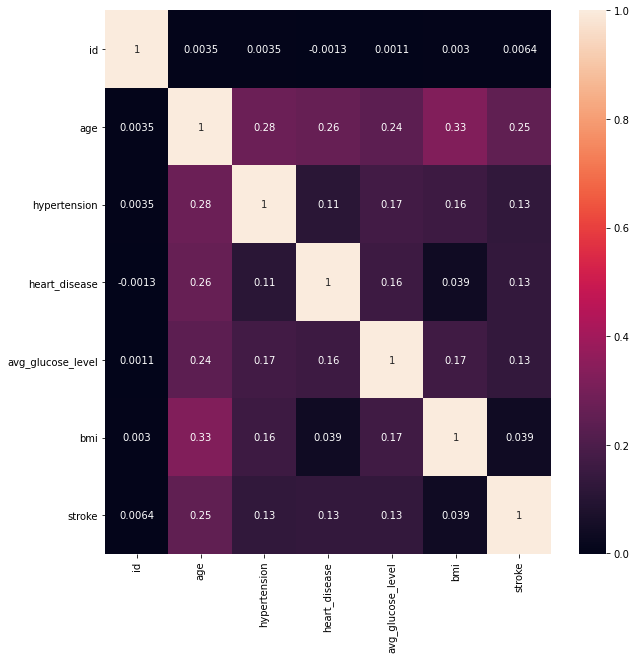

In [8]:
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(df.corr(method='pearson'), annot=True, ax=ax)

## Id is less Important so remove it

In [9]:
df.drop(labels="id", axis="columns", inplace=True)
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1


# Have some analysis - data visualize

<AxesSubplot:xlabel='hypertension', ylabel='count'>

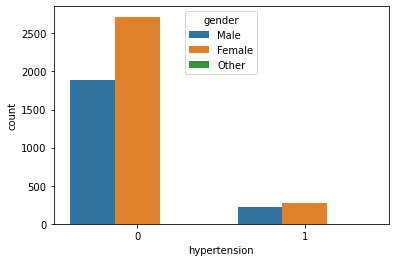

In [10]:
# gender wise hypertension count
sns.countplot(x="hypertension", data=df, hue="gender")

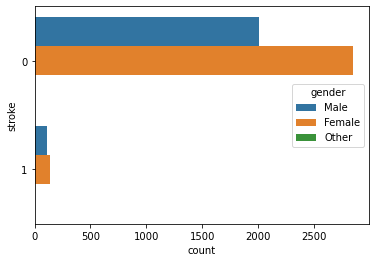

In [11]:
# gender wise stroke count
sns.countplot(y="stroke", hue="gender", data=df);

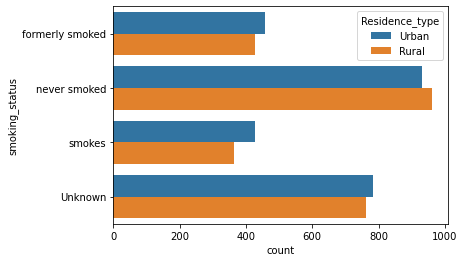

In [12]:
# Resident type wise Smoking level
sns.countplot(y="smoking_status", hue="Residence_type", data=df);

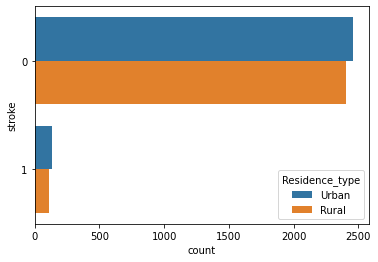

In [13]:
# Resident wise stroke
sns.countplot(y="stroke", hue="Residence_type", data=df);

## Check Unique where category value

In [14]:
# Gender
df.gender.unique()

array(['Male', 'Female', 'Other'], dtype=object)

In [15]:
# Work type
df.work_type.unique()

array(['Private', 'Self-employed', 'Govt_job', 'children', 'Never_worked'],
      dtype=object)

In [16]:
# Residence
df.Residence_type.unique()

array(['Urban', 'Rural'], dtype=object)

In [17]:
# smoking
df.smoking_status.unique()

array(['formerly smoked', 'never smoked', 'smokes', 'Unknown'],
      dtype=object)

In [18]:
# Marrital status
df.ever_married.unique()

array(['Yes', 'No'], dtype=object)

## Have to Encod categorycal value

In [19]:
from sklearn.preprocessing import LabelEncoder

In [20]:
encoder = LabelEncoder()

In [21]:
df['gender'] = encoder.fit_transform(df['gender'])
df['ever_married'] = encoder.fit_transform(df['ever_married'])
df['work_type'] = encoder.fit_transform(df['work_type'])
df['smoking_status'] = encoder.fit_transform(df['smoking_status'])
df['Residence_type'] = encoder.fit_transform(df['Residence_type'])

In [22]:
df.head(10)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,2,1,228.69,36.600000,1,1
1,0,61.0,0,0,1,3,0,202.21,28.893237,2,1
2,1,80.0,0,1,1,2,0,105.92,32.500000,2,1
3,0,49.0,0,0,1,2,1,171.23,34.400000,3,1
4,0,79.0,1,0,1,3,0,174.12,24.000000,2,1
5,1,81.0,0,0,1,2,1,186.21,29.000000,1,1
6,1,74.0,1,1,1,2,0,70.09,27.400000,2,1
7,0,69.0,0,0,0,2,1,94.39,22.800000,2,1
8,0,59.0,0,0,1,2,0,76.15,28.893237,0,1
9,0,78.0,0,0,1,2,1,58.57,24.200000,0,1


### inconsistancy values found for age, avg_glucose_level & bmi so have to scaling the values

In [23]:
# here we are using minmax scalar
from sklearn.preprocessing import MinMaxScaler

In [24]:
min_max  = MinMaxScaler()

In [25]:
df['age'] = min_max.fit_transform(df[['age']])
df['avg_glucose_level'] = min_max.fit_transform(df[['avg_glucose_level']])
df['bmi'] = min_max.fit_transform(df[['bmi']])

In [26]:
df.head(10)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,0.816895,0,1,1,2,1,0.801265,0.301260,1,1
1,0,0.743652,0,0,1,3,0,0.679023,0.212981,2,1
2,1,0.975586,0,1,1,2,0,0.234512,0.254296,2,1
3,0,0.597168,0,0,1,2,1,0.536008,0.276060,3,1
4,0,0.963379,1,0,1,3,0,0.549349,0.156930,2,1
5,1,0.987793,0,0,1,2,1,0.605161,0.214204,1,1
6,1,0.902344,1,1,1,2,0,0.069107,0.195876,2,1
7,0,0.841309,0,0,0,2,1,0.181285,0.143184,2,1
8,0,0.719238,0,0,1,2,0,0.097082,0.212981,0,1
9,0,0.951172,0,0,1,2,1,0.015927,0.159221,0,1


## Train test data split

In [27]:
from sklearn.model_selection import train_test_split

In [28]:
# get all the features except stroke for x
x = df.drop('stroke', axis='columns')

In [29]:
# only the stroke value for y
y = df['stroke']

In [30]:
xtrain, xtest, ytrain, ytest = train_test_split(x,y, test_size=0.25, random_state=1)

## Select the neural network model

In [31]:
# we are using Multi-layer Perceptron (MLP)
from sklearn.neural_network import MLPClassifier

In [32]:
model = MLPClassifier(max_iter=1000,random_state=1,learning_rate="constant")

In [33]:
model.fit(xtrain, ytrain)

MLPClassifier(max_iter=1000, random_state=1)

In [34]:
model.score(xtest, ytest)

0.9405320813771518

In [35]:
predicts = model.predict(xtest)

## To do dump our model for deploy

In [ ]:
#import joblib as jb

In [ ]:
#jb.dump(model, "stroke_prediction")